In [1]:
import cobra
import pandas as pd
from collections import OrderedDict

from sklearn.linear_model import LinearRegression
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
%matplotlib inline

In [2]:
df_data = pd.read_excel('./phenotype_data_collection_2022-05-06.xlsx', sheet_name='Data')
idx = [i for i in range(0,72)]
df_data = df_data.loc[idx, :]
df_data.index = df_data.Dataset.to_list()
df_data = df_data[df_data.maxATPM_FBA.isnull() == False]

In [3]:
groups = ['Chemo', 'BatchAero']

In [4]:
ngam = 1
idx_in = []
for g in groups:
    idx_in += df_data[df_data.Group == g].index.to_list()
df = df_data.loc[idx_in, :]

LRmodel = LinearRegression(fit_intercept=False)
x = df.Growth_rate.to_list()
x_fit = np.array(x).reshape(-1,1)
y = [i-ngam for i in df.maxATPM_FBA]
y_fit = np.array(y).reshape(-1,1)

LRmodel.fit(x_fit, y_fit)
res_m1 = dict()
res_m1['a'] = LRmodel.coef_[0][0]
res_m1['R2'] = LRmodel.score(x_fit,y_fit)

print('n =', df.shape[0])
print('Slope =', res_m1['a'])
print('R2 =', res_m1['R2'])

n = 31
Slope = 91.97661903700994
R2 = 0.9392460342968495


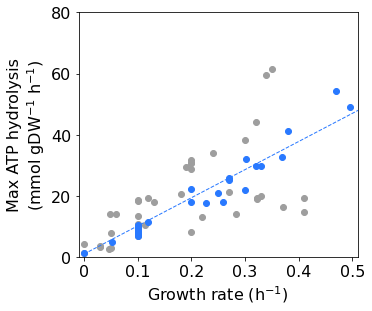

In [5]:
fig,ax = plt.subplots(figsize=(5,4.5))
color = '#2979ff'

idx_in = []
for g in groups:
    idx_in += df_data[df_data.Group == g].index.to_list()
idx_out = [i for i in df_data.index if i not in idx_in]

df = df_data.loc[idx_out,:]
x = df.Growth_rate.to_list()
y = df.maxATPM_FBA.to_list()
ax.scatter(x, y, color='#9e9e9e')

df = df_data.loc[idx_in,:]
x = df.Growth_rate.to_list()
y = df.maxATPM_FBA.to_list()
ax.scatter(x, y, color=color)

x_line = [0, 0.52]
y_line = [ngam, ngam + res_m1['a']*x_line[1]]
line = mlines.Line2D(x_line, y_line, color=color, linestyle='--', linewidth=1)
ax.add_line(line);

ax.set_xlim(-0.01,0.51);
ax.set_ylim(0,80);

yticks = [0,20,40,60,80]
ax.set_yticks(yticks);
ax.set_yticklabels(yticks, fontsize=16)
ax.set_ylabel('Max ATP hydrolysis\n' + '(mmol gDW$^{-1}$ h$^{-1}$)', fontsize=16);

xticks = [0,0.1,0.2,0.3,0.4,0.5]
ax.set_xticks(xticks);
ax.set_xticklabels(xticks, fontsize=16);
ax.set_xlabel('Growth rate (h$^{-1}$)', fontsize=16);

#plt.savefig('../../../scRBA_figures/components/ATPM_g3_chemoBatchAero.png', transparent=True, bbox_inches='tight')

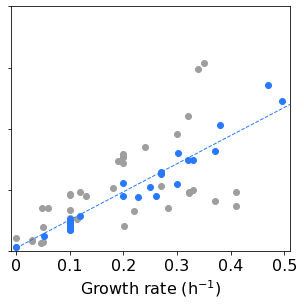

In [6]:
fig,ax = plt.subplots(figsize=(5,4.5))
color = '#2979ff'

idx_in = []
for g in groups:
    idx_in += df_data[df_data.Group == g].index.to_list()
idx_out = [i for i in df_data.index if i not in idx_in]

df = df_data.loc[idx_out,:]
x = df.Growth_rate.to_list()
y = df.maxATPM_FBA.to_list()
ax.scatter(x, y, color='#9e9e9e')

df = df_data.loc[idx_in,:]
x = df.Growth_rate.to_list()
y = df.maxATPM_FBA.to_list()
ax.scatter(x, y, color=color)

x_line = [0, 0.52]
y_line = [ngam, ngam + res_m1['a']*x_line[1]]
line = mlines.Line2D(x_line, y_line, color=color, linestyle='--', linewidth=1)
ax.add_line(line);

ax.set_xlim(-0.01,0.51);
ax.set_ylim(0,80);

yticks = [0,20,40,60,80]
ax.set_yticks(yticks);
ax.set_yticklabels(['']*len(yticks), fontsize=16)

xticks = [0,0.1,0.2,0.3,0.4,0.5]
ax.set_xticks(xticks);
ax.set_xticklabels(xticks, fontsize=16);
ax.set_xlabel('Growth rate (h$^{-1}$)', fontsize=16);

#plt.savefig('../../../scRBA_figures/components/ATPM_g3_chemoBatchAero_noylabels.png', transparent=True, bbox_inches='tight')